## Real Un-Directed Networks and Characteristic

Take a real network of your own choice and perform below given tasks. You can find examples here: http://networksciencebook.com/translations/en/resources/data.html where the networks are represented by edge lists.

1. Draw the graph
2. Number of nodes and edges, list of nodes and edges and number and list of cycles
3. Adjacency matrix
4. Degree of each node and degree distribution. Also, average degree, typical degree and nodes with the largest degree.
5. Following centrality measures and distribution. 

        a. Eigenvector Centrality
        b. Betweenness Centality
        c. Closeness Centrality
        
   Also, average respective centrality and nodes with the largest centrality value:
6. Geodesic Distance between each pair of node and  distribution. Also average distance and diameter.
7. Local Clustering Coefficient for each node and distribution. Also, average clustering coefficient and nodes with the largest local clustering coefficient.
8. Connectance , number of components and the size of the largest component
9. Is the graph scale free?
10. Does the graph show small world behavior? 
11. Is it supercritical?

In [1]:
# Import the required libraries 

import my_graph
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

I am selecting a protein-protein interaction network for analysis from the following link: http://networksciencebook.com/translations/en/resources/data.html

The set of all protein-protein interactions forms a protein-protein interaction network, in which the vertices are proteins and two vertices are connected by an undirected edge if the corresponding proteins interact.

### 1. Draw the graph:

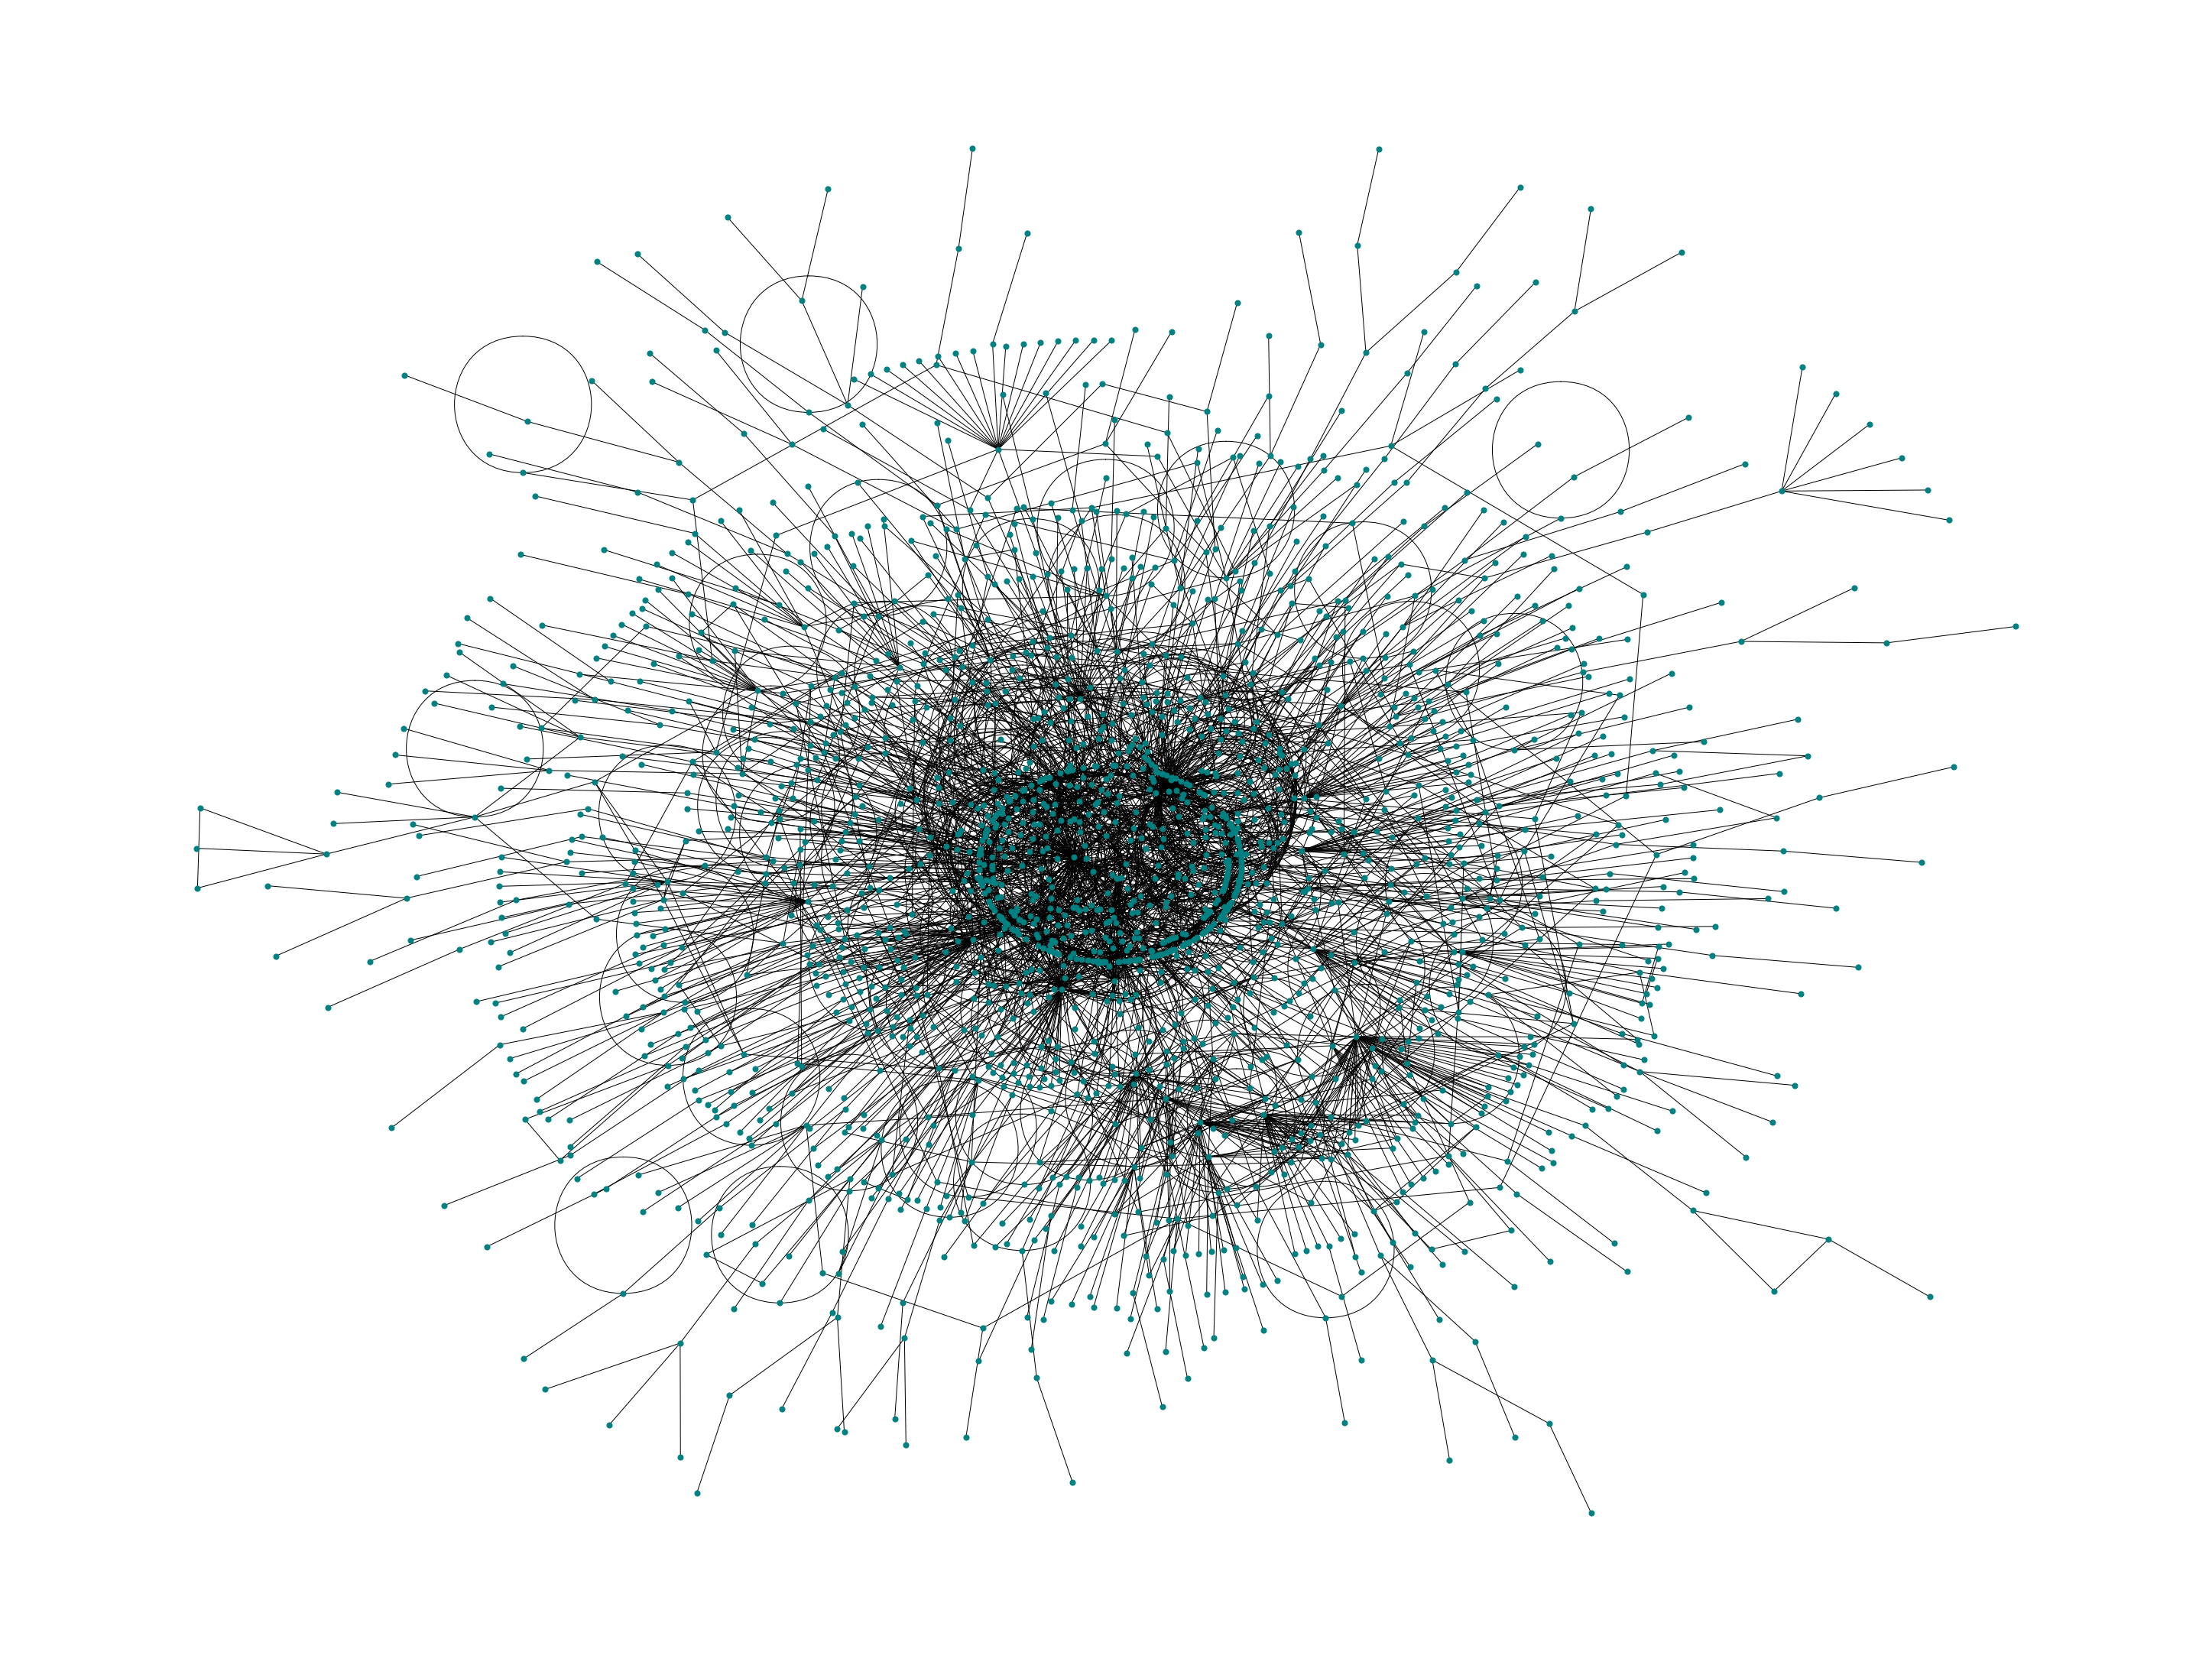

In [2]:
# Data set is loaded to plot a real network
data = pd.read_csv("protein_edgelist.csv")


# Define the graph
G_protein = nx.Graph()
G_protein = nx.from_pandas_edgelist(data, "src", "des")


# Configure figure size to Draw the graph
plt.figure(figsize=(40, 30))


# Plot the graph
nx.draw_kamada_kawai(G_protein, node_color='teal', node_size=50)

### 2. Number of Nodes and Edges, List of Nodes and Edges and Number and list of Cycles:

In [3]:
# Find no of nodes of the graph
num_of_nodes = nx.number_of_nodes(G_protein)
print(f"Number of nodes in the protein-protein interaction network is: {num_of_nodes}", "\n")

# Find no of edges of the graph
num_of_edges = nx.number_of_edges(G_protein)
print(f"Number of edges in the protein-protein interaction network is: {num_of_edges}", "\n")

# Find node list of the graph
node_list = nx.nodes(G_protein)
print(f"Node list of the protein-protein interaction network is: {node_list}", "\n")

# Find edge list of the graph
edge_list = nx.edges(G_protein)
print(f"Edge list of the protein-protein interaction network is: {edge_list}", "\n")

# Find number of cycles if any in the graph
cycles = nx.find_cycle(G_protein,orientation = "original" )
print(f"Number of cycles in the network is: {len(cycles)}", "\n")

# Print cycles if any in the graph
print(f"List of cycles in the network are {cycles}", "\n")

Number of nodes in the protein-protein interaction network is: 2018 

Number of edges in the protein-protein interaction network is: 2930 

Node list of the protein-protein interaction network is: [0, 1050, 1, 229, 2, 3, 467, 4, 1228, 5, 6, 94, 7, 8, 971, 1620, 9, 63, 10, 1056, 1514, 1530, 1701, 11, 935, 12, 1877, 13, 330, 14, 490, 504, 537, 1375, 1400, 1651, 1912, 15, 731, 806, 1133, 1186, 16, 394, 1804, 17, 1022, 18, 135, 19, 370, 627, 1645, 1657, 20, 1225, 21, 1606, 22, 420, 1282, 1637, 23, 267, 813, 24, 594, 25, 1347, 26, 123, 388, 27, 1076, 28, 617, 29, 30, 31, 82, 372, 488, 553, 596, 707, 748, 866, 1051, 1057, 1096, 1103, 1352, 1377, 1443, 1498, 1646, 1660, 1674, 1741, 1876, 1987, 2001, 32, 140, 203, 33, 688, 34, 577, 35, 359, 36, 37, 520, 38, 889, 39, 1221, 40, 1024, 41, 515, 1883, 42, 514, 1017, 43, 752, 1856, 44, 382, 511, 1292, 1356, 1572, 1910, 1954, 45, 1558, 46, 220, 823, 1406, 47, 1611, 2006, 48, 1609, 49, 669, 1114, 50, 1131, 51, 574, 52, 71, 371, 53, 2016, 54, 1640, 55,

### 3. Adjacency Matrix:

In [4]:
adj_matrix = my_graph.find_adj_matrix(G_protein)

# To print matrix without truncation enable below option
# np.set_printoptions(threshold=np.inf)

print(f"The Adjacency Matrix A_ij is:\n\n {adj_matrix.todense()}", "\n")

The Adjacency Matrix A_ij is:

 [[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]] 



In [5]:
# Check the shape of adjacency matrix
print(f"The size of Adjacency Matrix A_ij is: {adj_matrix.todense().shape}", "\n")

The size of Adjacency Matrix A_ij is: (2018, 2018) 



### 4. Degree of each node and degree distribution of the graph. Also, average degree, typical degree and nodes with the largest degree:

#### Degree of each node of the graph:

In [6]:
degrees = my_graph.find_degrees(G_protein, directed=False)
print(f"Degree for each node of the graph is:\n {degrees}","\n")

Degree for each node of the graph is:
 {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 2, 8: 2, 9: 1, 10: 4, 11: 1, 12: 1, 13: 1, 14: 8, 15: 4, 16: 4, 17: 1, 18: 1, 19: 4, 20: 3, 21: 1, 22: 3, 23: 2, 24: 1, 25: 1, 26: 2, 27: 1, 28: 1, 29: 2, 30: 26, 31: 4, 32: 2, 33: 4, 34: 1, 35: 1, 36: 2, 37: 1, 38: 1, 39: 1, 40: 1, 41: 2, 42: 2, 43: 2, 44: 7, 45: 1, 46: 3, 47: 4, 48: 1, 49: 3, 50: 1, 51: 1, 52: 2, 53: 1, 54: 1, 55: 2, 56: 2, 57: 1, 58: 1, 59: 4, 60: 1, 61: 1, 62: 1, 63: 1, 64: 2, 65: 4, 66: 1, 67: 1, 68: 4, 69: 1, 70: 1, 71: 4, 72: 3, 73: 1, 74: 4, 75: 2, 76: 2, 77: 1, 78: 2, 79: 1, 80: 1, 81: 1, 82: 2, 83: 1, 84: 2, 85: 1, 86: 10, 87: 5, 88: 6, 89: 3, 90: 9, 91: 2, 92: 1, 93: 2, 94: 1, 95: 1, 96: 6, 97: 4, 98: 3, 99: 1, 100: 2, 101: 1, 102: 1, 103: 1, 104: 4, 105: 1, 106: 2, 107: 1, 108: 2, 109: 2, 110: 6, 111: 5, 112: 2, 113: 2, 114: 1, 115: 2, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 3, 122: 3, 123: 1, 124: 6, 125: 2, 126: 2, 127: 1, 128: 4, 129: 1, 130: 4, 131: 2, 132: 2, 133:

#### Degree Distribution

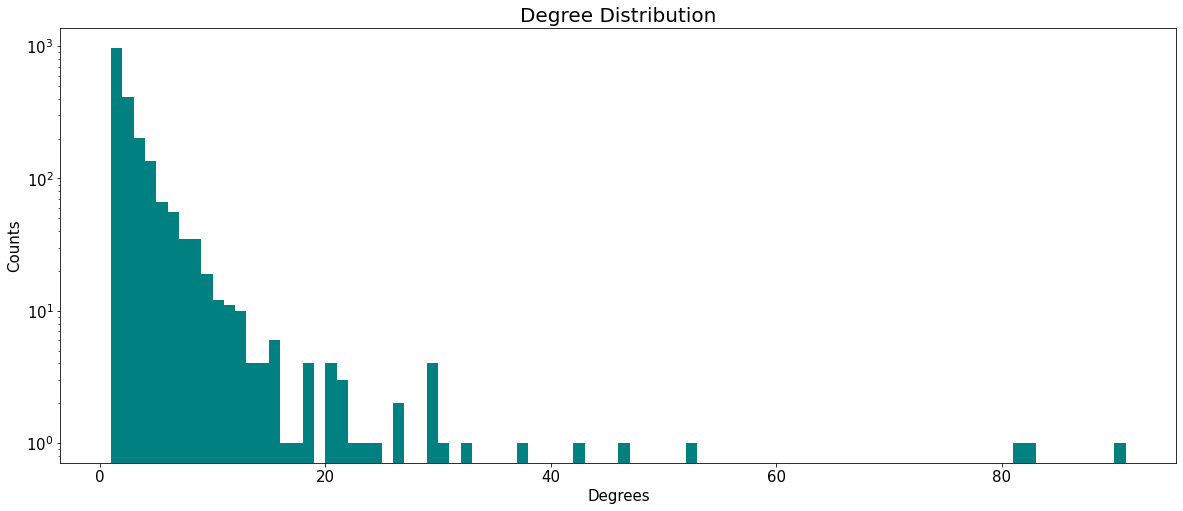

In [7]:
# plot historgram for degrees of the graph
my_graph.plot_distribution(in_list=degrees.values(), pdf=False, cum=False, bw=1,\
                        title="Degree Distribution",\
                        x_label="Degrees", y_label="Counts",\
                        x_scale="linear", y_scale="log",\
                        c="teal")

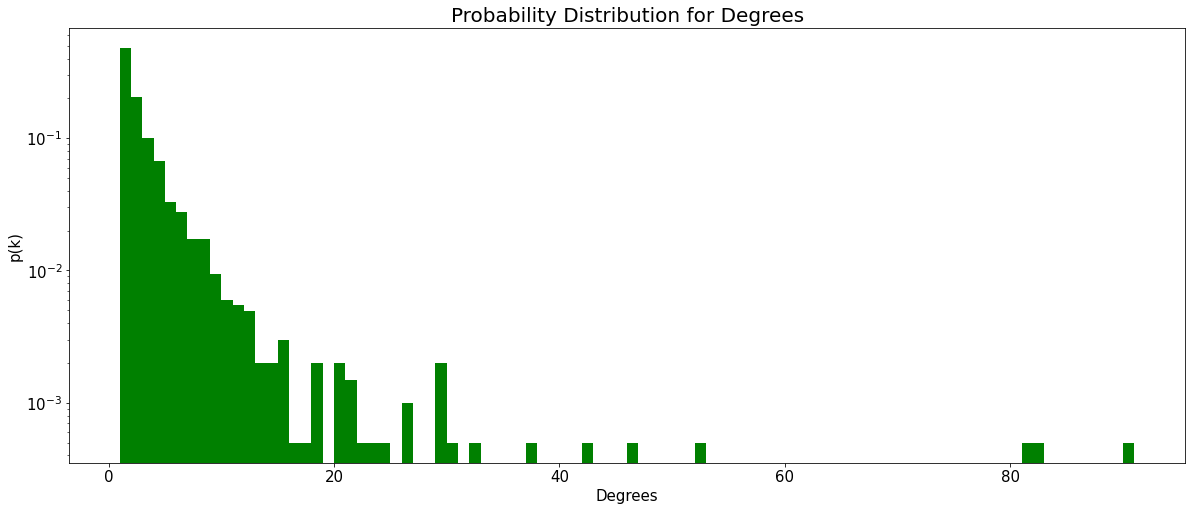

In [8]:
# plot probability distribution for degrees of the graph
my_graph.plot_distribution(in_list=degrees.values(), pdf=True, cum=False,bw=1,\
                        title="Probability Distribution for Degrees",\
                        x_label="Degrees", y_label="p(k)",\
                        x_scale="linear", y_scale="log",\
                        c="green")

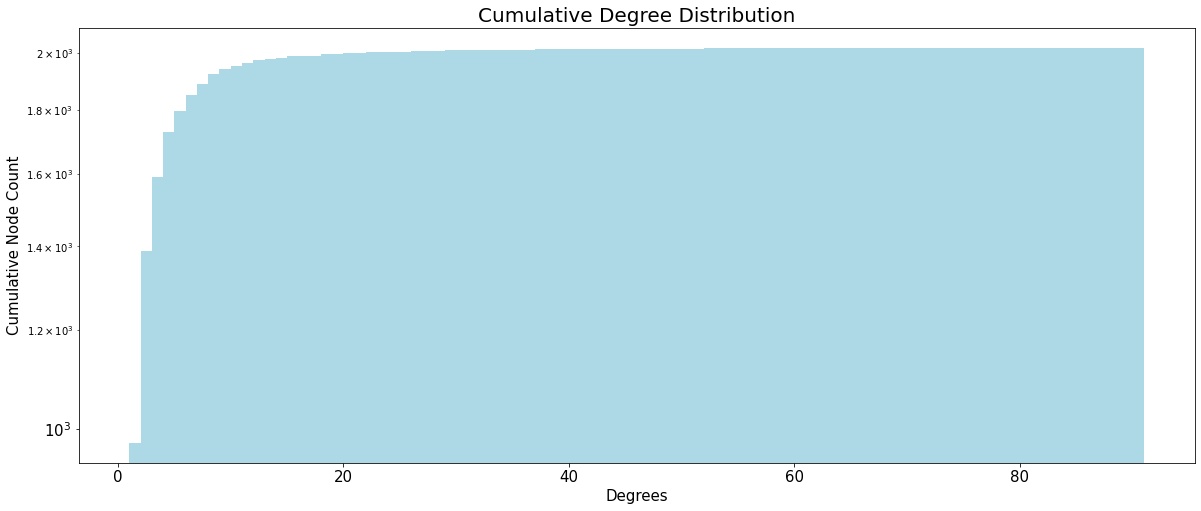

In [9]:
# plot cumulative distribution for degrees of the graph
my_graph.plot_distribution(in_list=degrees.values(), pdf=False, cum=True, bw=1,\
                        title="Cumulative Degree Distribution", \
                        x_label="Degrees", y_label="Cumulative Node Count",\
                        x_scale="linear", y_scale="log",\
                        c="lightblue")

#### Average Degree and Typical Degree of the graph

1. Average Degree (\<k>) is: 

$$ \langle k \rangle = \frac{2m}{n} $$

Here:
* m = number of edges in the graph
* n = number of nodes in the graph


2. Typical Degree is: 

$$ k_{typ} = \sqrt{\frac{\sum_{i,n} {k^2_{i}}} {n}}$$

In [10]:
# Find average/mean degree of the graph
avg_degree = sum(degrees.values())/num_of_nodes
print(f"Average degree of the graph is: {round(avg_degree,3)}","\n")


# Find typical degree of the graph
k_square = 0
for d in degrees.values():
    k_square += (d)**2

typical_degree = round(math.sqrt(k_square/num_of_nodes), 3)
print(f"The typical degree of the graph is: {typical_degree}", "\n")

Average degree of the graph is: 2.904 

The typical degree of the graph is: 5.68 



#### Nodes with largest degree

In [11]:
# Find the nodes with largest degree
nodes_with_max_degree = my_graph.find_node_with_largest_val(degrees)
print(f"Nodes with largest degree in the graph are: {nodes_with_max_degree}", "\n")

Nodes with largest degree in the graph are: [1356] 



### 5. Centrality Measures

1. Eigenvector Centrality
2. Betweenness Centality
3. Closeness Centrality

### 1. Eigenvector Centrality:

A natural extension of the simple degree centrality is eigenvector centrality. Instead of awarding vertices just point for each neighbour, eigenvector centrality gives each vertex a score proportional to the sum of the scores of its neighbours.

The Eigenvector Centrality has nice property that it can be larger either because a vertex has many neighbours or it has important neighbours (or both).

The Eigenvector centrality for node $i$ is:  
$$x_{i} = \alpha \sum_{j} A_{ij} x_{j}$$

Here
* $A$ is the adjacency matrix of graph G.

#### Eigenvector Centrality for each node

In [12]:
# Find eigenvector centrality for each node
ev_cent = my_graph.find_eigenvector_centrality(G_protein, 1000)
print(f"Eigenvector Centrality for each node of the graph is:\n {ev_cent}","\n")

Eigenvector Centrality for each node of the graph is:
 {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.001, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.001, 9: 0.0, 10: 0.007, 11: 0.0, 12: 0.0, 13: 0.008, 14: 0.027, 15: 0.014, 16: 0.016, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.006, 21: 0.0, 22: 0.024, 23: 0.001, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.015, 31: 0.002, 32: 0.001, 33: 0.002, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.003, 41: 0.018, 42: 0.002, 43: 0.001, 44: 0.04, 45: 0.0, 46: 0.004, 47: 0.0, 48: 0.0, 49: 0.008, 50: 0.0, 51: 0.0, 52: 0.0, 53: 0.001, 54: 0.0, 55: 0.0, 56: 0.0, 57: 0.0, 58: 0.0, 59: 0.035, 60: 0.0, 61: 0.0, 62: 0.005, 63: 0.0, 64: 0.0, 65: 0.003, 66: 0.0, 67: 0.001, 68: 0.003, 69: 0.002, 70: 0.0, 71: 0.006, 72: 0.0, 73: 0.0, 74: 0.0, 75: 0.0, 76: 0.001, 77: 0.0, 78: 0.0, 79: 0.0, 80: 0.002, 81: 0.0, 82: 0.002, 83: 0.004, 84: 0.001, 85: 0.0, 86: 0.01, 87: 0.004, 88: 0.06, 89: 0.003, 90: 0.104, 91: 0.0, 92: 0.005, 93: 0.0, 94: 0.0, 95: 0.013, 96: 0.004, 

Note: The normalisation condition used in python Networkx package is following:

> sum of square of Eigenvector Centralities of each node equal to one.

Same observation is shown below:

In [13]:
round(sum((ev_cent[key])**2 for key in ev_cent), 3)

0.999

#### Eigenvector Centrality Distribution

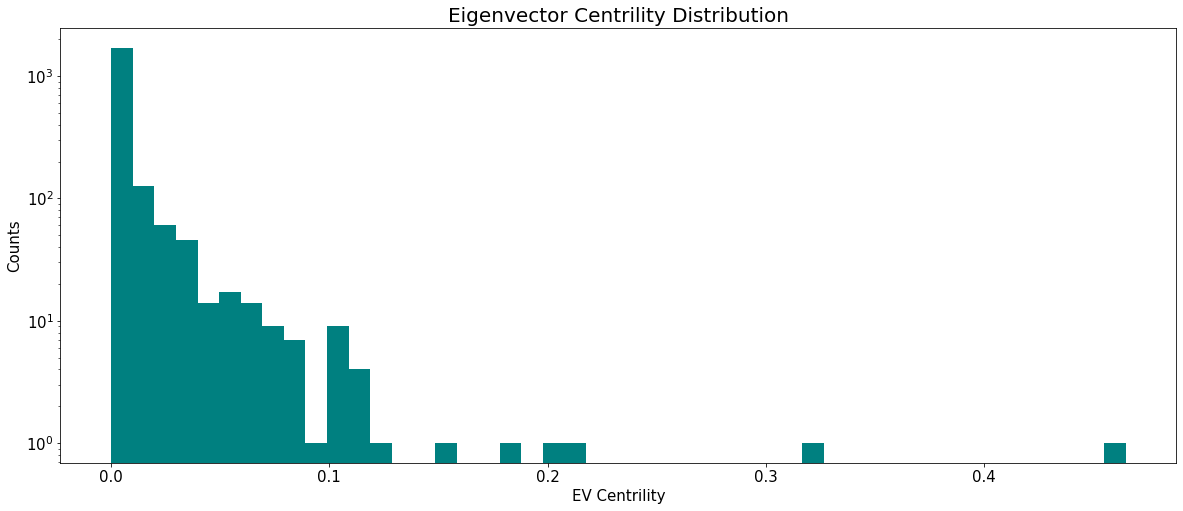

In [14]:
# plot historgram for Eigenvector Centrality of the graph
my_graph.plot_distribution(in_list=ev_cent.values(), pdf=False, cum=False, bw=0.01,\
                        title="Eigenvector Centrility Distribution", \
                        x_label="EV Centrility", y_label="Counts",\
                        x_scale="linear", y_scale="log", \
                        c="teal")

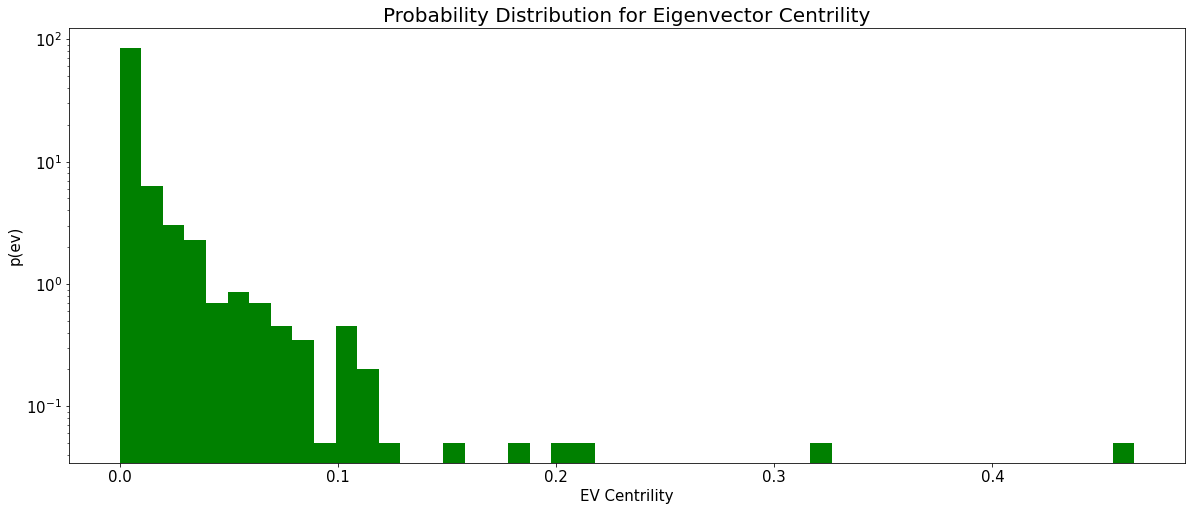

In [15]:
# plot probability distribution for Eigenvector Centrality of the graph
my_graph.plot_distribution(in_list=ev_cent.values(), pdf=True, cum=False, bw=0.01, \
                        title="Probability Distribution for Eigenvector Centrility",\
                        x_label="EV Centrility", y_label="p(ev)",\
                        x_scale="linear", y_scale="log",\
                        c="green")

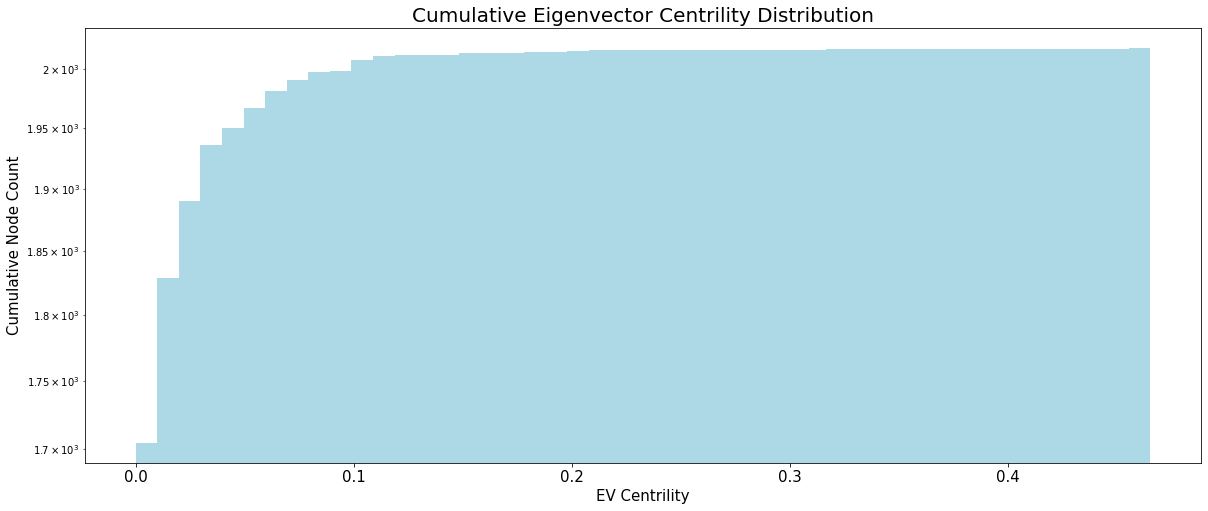

In [16]:
# plot cumulative distribution for Eigenvector Centrality of the graph
my_graph.plot_distribution(in_list=ev_cent.values(), pdf=False, cum=True, bw=0.01,\
                        title="Cumulative Eigenvector Centrility Distribution",\
                        x_label="EV Centrility", y_label="Cumulative Node Count",\
                        x_scale="linear", y_scale="log", \
                        c="lightblue")

#### Average Eigenvector Centrality of the graph

In [17]:
# Find mean eigenvector centrality
mean_ev_cent = sum(ev_cent.values())/len(ev_cent.values())
print(f"Mean Eigenvector Centrality of the graph is: {round(mean_ev_cent,3)}", "\n")

Mean Eigenvector Centrality of the graph is: 0.007 



#### Nodes with the Largest Eigenvector Centrality

In [18]:
# Find the nodes with largest eigenvector centality
nodes_with_max_ev_cent = my_graph.find_node_with_largest_val(ev_cent)
print(f"Nodes with largest eigenvector centrality are: {nodes_with_max_ev_cent}", "\n")

Nodes with largest eigenvector centrality are: [1356] 



### 2. Betweenness Centrality

Betweenness Centrality measures the extent to which a vertex lies on paths between other vertices. It measure centrality based on shortest paths in a graph.

The Betweenness Centrality for node i is:
  
$$x_{i} = \sum_{st} \frac{n_{st,i}}{g_{st}}$$


Here, 

* ${n_{st,i}}$ is number of geodesic paths from s to t that pass through i.
* ${g_{st}}$ is total number of geodesic paths from s to t.


#### Betweenness Centrality for each node of the graph

In [19]:
# Find betweenness centrality for each node
between_cent = my_graph.find_betweenness_centrality(G_protein)
print(f"Betweenness Centrality for each node of the graph is:\n {between_cent}", "\n")

Betweenness Centrality for each node of the graph is:
 {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.002, 9: 0.0, 10: 0.001, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.011, 15: 0.001, 16: 0.002, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.002, 21: 0.0, 22: 0.004, 23: 0.001, 24: 0.0, 25: 0.0, 26: 0.001, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.01, 31: 0.0, 32: 0.001, 33: 0.002, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.004, 45: 0.0, 46: 0.001, 47: 0.0, 48: 0.0, 49: 0.001, 50: 0.0, 51: 0.0, 52: 0.0, 53: 0.0, 54: 0.0, 55: 0.0, 56: 0.001, 57: 0.0, 58: 0.0, 59: 0.009, 60: 0.0, 61: 0.0, 62: 0.0, 63: 0.0, 64: 0.0, 65: 0.002, 66: 0.0, 67: 0.0, 68: 0.0, 69: 0.0, 70: 0.0, 71: 0.002, 72: 0.003, 73: 0.0, 74: 0.001, 75: 0.0, 76: 0.0, 77: 0.0, 78: 0.0, 79: 0.0, 80: 0.0, 81: 0.0, 82: 0.002, 83: 0.0, 84: 0.002, 85: 0.0, 86: 0.005, 87: 0.001, 88: 0.0, 89: 0.002, 90: 0.014, 91: 0.0, 92: 0.0, 93: 0.0, 94: 0.0, 95: 0.0, 96: 0.007, 97: 0.003, 98: 0.0, 99: 0.

#### Betweenness Centrality Distribution

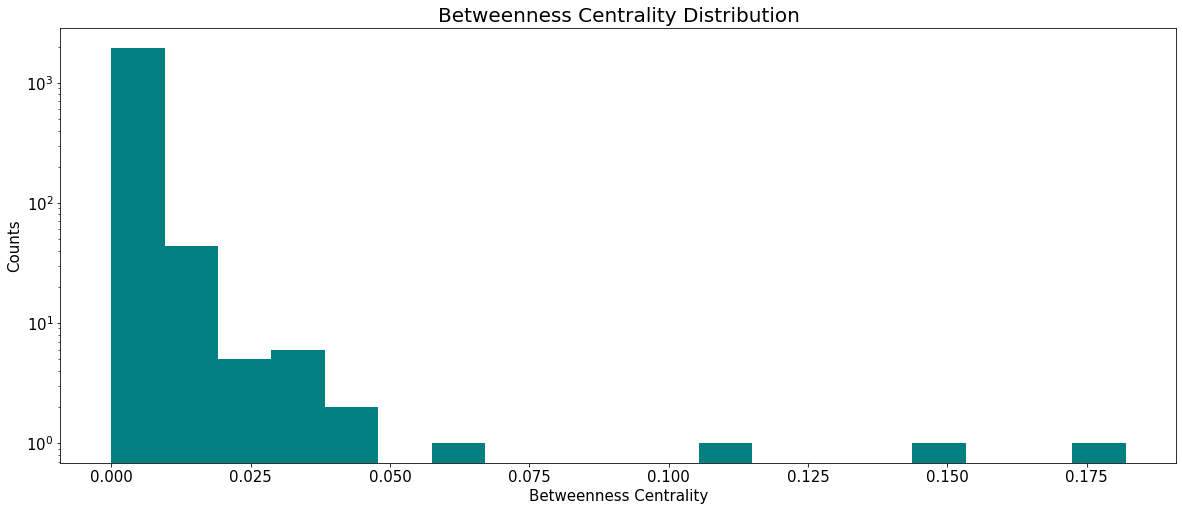

In [20]:
# plot historgram for betweenness centrality of the graph
my_graph.plot_distribution(in_list=between_cent.values(), pdf=False, cum=False, bw=0.01,\
                        title="Betweenness Centrality Distribution", \
                        x_label="Betweenness Centrality", y_label="Counts",\
                        x_scale="linear", y_scale="log",\
                        c="teal")

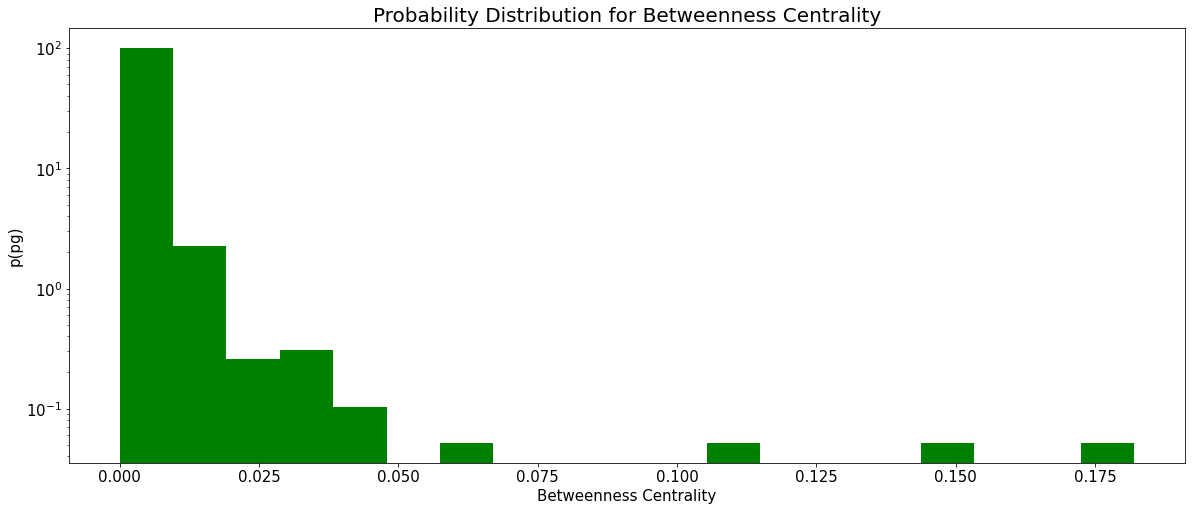

In [21]:
# plot probability distribution for betweenness centrality of the graph
my_graph.plot_distribution(in_list=between_cent.values(), pdf=True, cum=False, bw=0.01, \
                        title="Probability Distribution for Betweenness Centrality",\
                        x_label="Betweenness Centrality", y_label="p(pg)", \
                        x_scale="linear", y_scale="log",\
                        c="green")

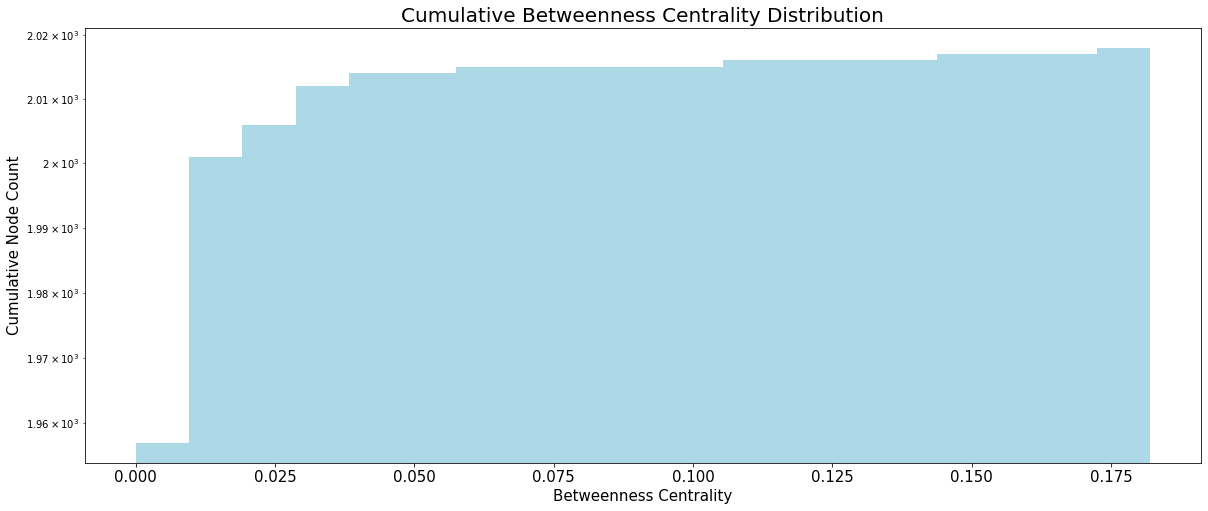

In [22]:
# plot cumulative distribution for betweenness centrality of the graph
my_graph.plot_distribution(in_list=between_cent.values(), pdf=False, cum=True, bw=0.01,\
                        title="Cumulative Betweenness Centrality Distribution",\
                        x_label="Betweenness Centrality", y_label="Cumulative Node Count",\
                        x_scale="linear", y_scale="log", \
                        c="lightblue")

#### Average Betweenness Centrality of the graph

In [23]:
# Find mean betweenness centrality
mean_bw_cent = sum(between_cent.values())/len(between_cent.values())
print(f"Mean Betweenness Centrality of the graph is: {round(mean_bw_cent,3)}", "\n")

Mean Betweenness Centrality of the graph is: 0.002 



#### Nodes with the Largest Betweenness Centrality

In [24]:
# Find the nodes with largest betweenness centrality
nodes_with_max_bw_cent = my_graph.find_node_with_largest_val(between_cent)
print(f"Nodes with largest betweenness centrality are: {nodes_with_max_bw_cent}", "\n")

Nodes with largest betweenness centrality are: [1356] 



### 3. Closeness Centrality

Closeness Centrality measures that how close a node is to all other nodes in the network.. 

The Closeness Centrality for node i is:

$$ cc_{i} = \frac{1}{d_{i}} = \frac{(n-1)}{\sum_{j} d_{ij}}$$

Here:
* $d_{ij}$ is the length of a geodesic path from i to j
* $d_{i}$ is mean geodesic distance from i to j
* n is number of nodes in the network

#### Closeness Centrality for each node of the graph

In [25]:
# Find closeness centrality for each node
close_cent = my_graph.find_closeness_centrality(G_protein)
print(f"Closeness Centrality for each node of the graph is:\n {close_cent}", "\n")

Closeness Centrality for each node of the graph is:
 {0: 0.145, 1: 0.115, 2: 0.115, 3: 0.141, 4: 0.127, 5: 0.115, 6: 0.0, 7: 0.0, 8: 0.145, 9: 0.0, 10: 0.172, 11: 0.127, 12: 0.001, 13: 0.173, 14: 0.191, 15: 0.179, 16: 0.188, 17: 0.126, 18: 0.001, 19: 0.131, 20: 0.164, 21: 0.144, 22: 0.176, 23: 0.154, 24: 0.14, 25: 0.107, 26: 0.114, 27: 0.001, 28: 0.001, 29: 0.0, 30: 0.175, 31: 0.147, 32: 0.15, 33: 0.149, 34: 0.0, 35: 0.001, 36: 0.0, 37: 0.134, 38: 0.132, 39: 0.132, 40: 0.159, 41: 0.17, 42: 0.15, 43: 0.152, 44: 0.192, 45: 0.09, 46: 0.159, 47: 0.001, 48: 0.109, 49: 0.169, 50: 0.0, 51: 0.001, 52: 0.141, 53: 0.141, 54: 0.129, 55: 0.137, 56: 0.1, 57: 0.001, 58: 0.138, 59: 0.19, 60: 0.0, 61: 0.102, 62: 0.157, 63: 0.0, 64: 0.0, 65: 0.156, 66: 0.001, 67: 0.151, 68: 0.151, 69: 0.149, 70: 0.001, 71: 0.163, 72: 0.113, 73: 0.001, 74: 0.112, 75: 0.0, 76: 0.142, 77: 0.09, 78: 0.001, 79: 0.0, 80: 0.151, 81: 0.001, 82: 0.152, 83: 0.157, 84: 0.141, 85: 0.0, 86: 0.178, 87: 0.156, 88: 0.196, 89: 0.157, 9

#### Closeness Centrality Distribution

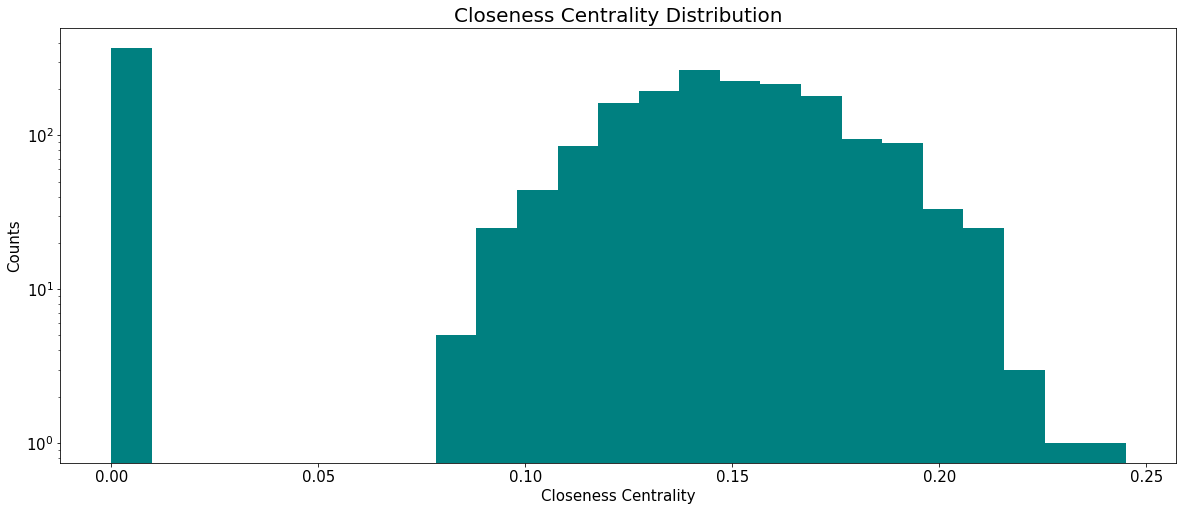

In [26]:
# plot historgram for closeness centrality of the graph
my_graph.plot_distribution(in_list=close_cent.values(), pdf=False, cum=False, bw=0.01,\
                        title="Closeness Centrality Distribution", \
                        x_label="Closeness Centrality", y_label="Counts",\
                        x_scale="linear", y_scale="log", \
                        c="teal")

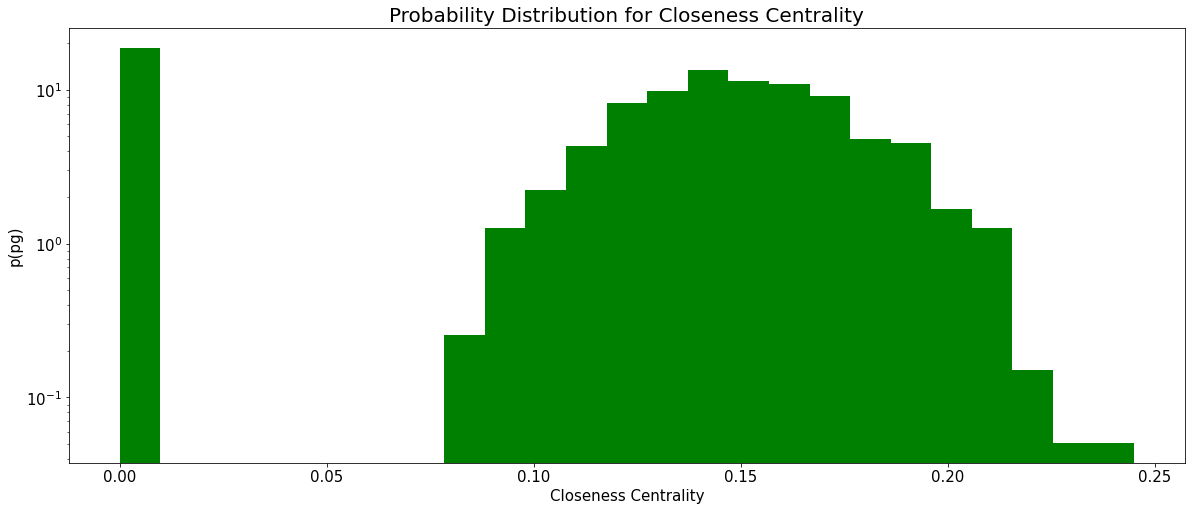

In [27]:
# plot probability distribution for closeness centrality of the graph
my_graph.plot_distribution(in_list=close_cent.values(), pdf=True, cum=False, bw=0.01, \
                        title="Probability Distribution for Closeness Centrality",\
                        x_label="Closeness Centrality", y_label="p(pg)", \
                        x_scale="linear", y_scale="log", \
                        c="green")

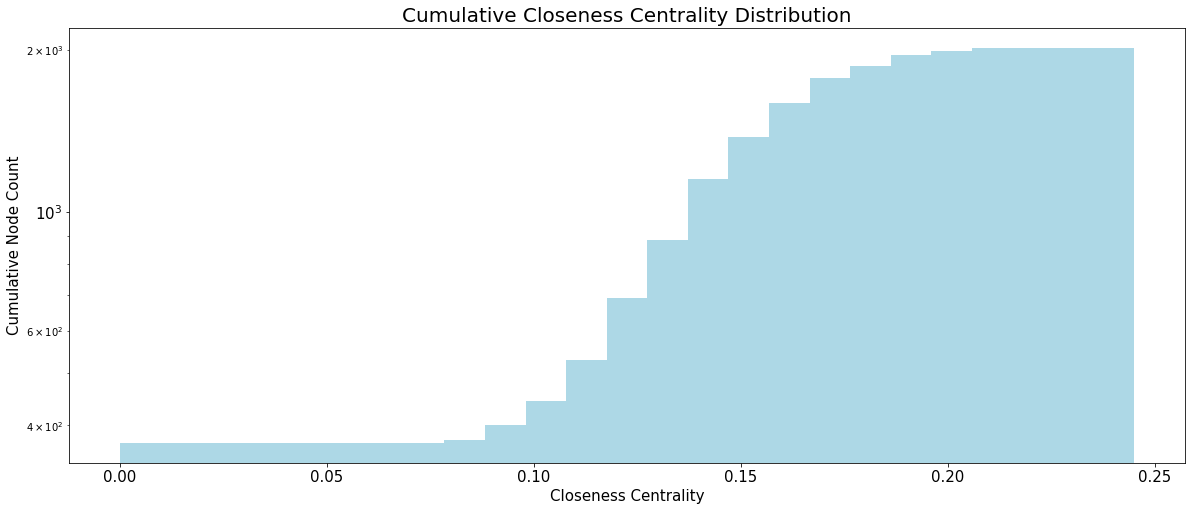

In [28]:
# plot cumulative distribution for closeness centrality of the graph
my_graph.plot_distribution(in_list=close_cent.values(), pdf=False, cum=True, bw=0.01,\
                        title="Cumulative Closeness Centrality Distribution", \
                        x_label="Closeness Centrality", y_label="Cumulative Node Count",\
                        x_scale="linear", y_scale="log", \
                        c="lightblue")

In [29]:
# Find mean closeness centrality
mean_close_cent = sum(close_cent.values())/len(close_cent.values())
print(f"Mean Closeness Centrality of the graph is: {round(mean_close_cent,3)}", "\n")

Mean Closeness Centrality of the graph is: 0.122 



In [30]:
# Find the nodes with largest closeness centrality
nodes_with_max_close_cent = my_graph.find_node_with_largest_val(close_cent)
print(f"Nodes with largest closeness centrality are: {nodes_with_max_close_cent}", "\n")

Nodes with largest closeness centrality are: [1356] 



### 6. Geodesic Distance between each pair of node and  Distribution. Also, Average Distance and Diameter:

#### Geodesic Distance between each pair of node

In [31]:
# Find list of all geodesic distances between the each pair of nodes of the graph
geo_dis = my_graph.find_geodesic_distance(G_protein)
print(f"List of geodesic distance between few pairs of nodes in the graph is:\n{geo_dis[0:10]}","\n")

List of geodesic distance between few pairs of nodes in the graph is:
[0, 1, 2, 2, 2, 3, 3, 3, 3, 3] 



#### Geodesic Distance Distribution

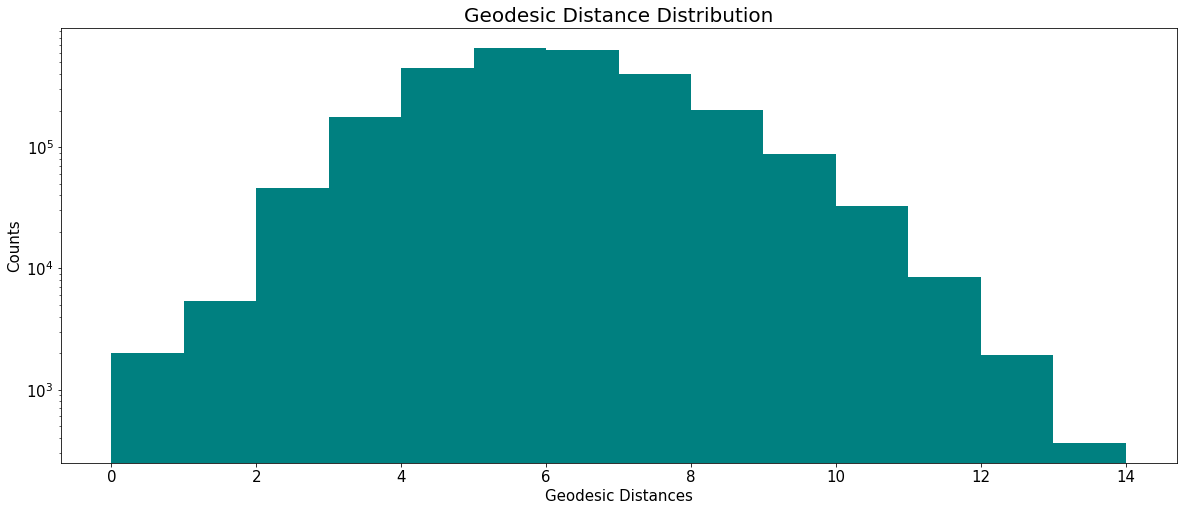

In [32]:
# plot historgram for geodesic distances of the graph
my_graph.plot_distribution(in_list=geo_dis, pdf=False, cum=False, bw=1,\
                        title="Geodesic Distance Distribution", \
                        x_label="Geodesic Distances", y_label="Counts",\
                        x_scale="linear", y_scale="log", \
                        c="teal")

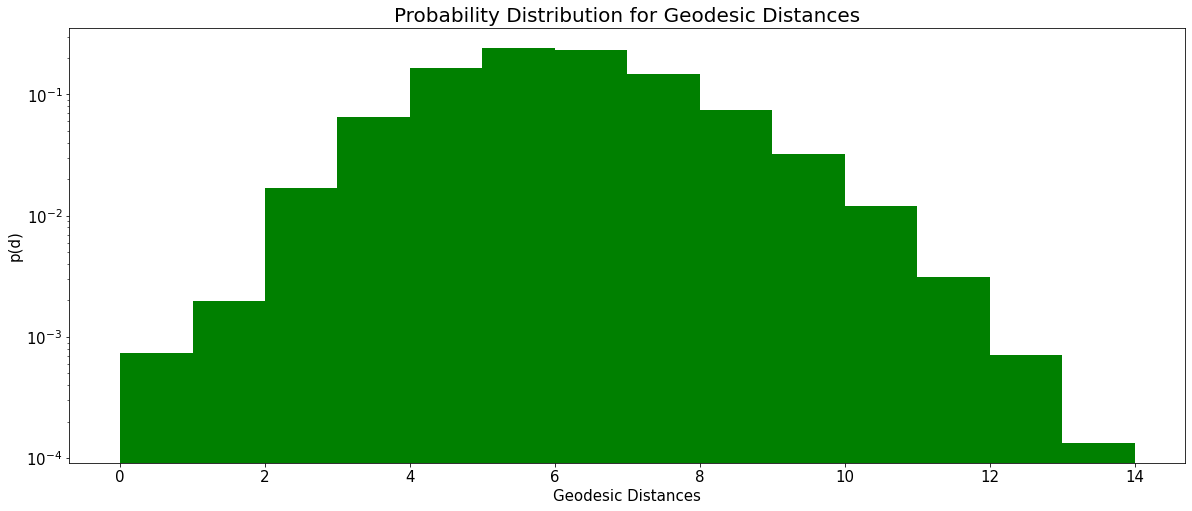

In [33]:
# plot probability distribution for geodesic distances of the graph
my_graph.plot_distribution(in_list=geo_dis, pdf=True, cum=False, bw=1, \
                        title="Probability Distribution for Geodesic Distances",\
                        x_label="Geodesic Distances", y_label="p(d)",\
                        x_scale="linear", y_scale="log",\
                        c="green")

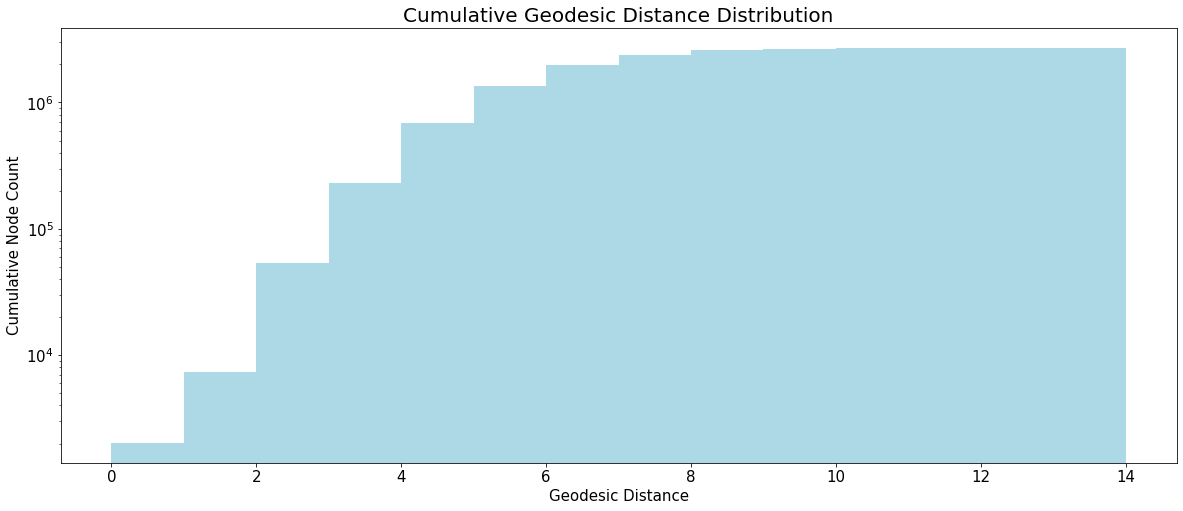

In [34]:
# plot cumulative distribution for geodesic distances of the graph
my_graph.plot_distribution(in_list=geo_dis, pdf=False, cum=True, bw=0.01,\
                        title="Cumulative Geodesic Distance Distribution",\
                        x_label="Geodesic Distance", y_label="Cumulative Node Count",\
                        x_scale="linear", y_scale="log", \
                        c="lightblue")

#### Average Geodesic Distance of the graph

Average of geodesic distance between all pairs of vertices of the graph is called the average distance of the graph.


The average distance is:      $\langle d \rangle = \frac{1}{n(n-1)} \sum \limits _{i,j} d_{i,j}$

Here, 
* $d_{i,j}$ is the geodesic distance from i to j in the graph
* n is no of vertices of the graph 

Using below code, we can find the average distance of the graph:

In [35]:
# Find mean geodesic distance of the graph
mean_geo_dis = sum(geo_dis)/len(geo_dis)
print(f"Mean Geodesic Distance of the graph is: {round(mean_geo_dis,3)}", "\n")

Mean Geodesic Distance of the graph is: 5.607 



#### Diameter of the graph

In [36]:
# Calulate diameter of the graph
dia = my_graph.find_diameter(G_protein)
print(f"Diameter of the graph is: {dia}", "\n")

Diameter of the graph is: 14 



### 7. Local Clustering Coefficient for each node and Distribution.  Also, Average Clustering Coefficient and Nodes with the Largest LLC:

The local clustering coefficient of a node in a graph quantifies how close its neighbours are to being a clique (complete graph).

The local cluster cofficient of node i (for undirected graph):

$$c_{i} = 2\frac{e_{i}}{k_{i} (k_{i}-1)}$$

Here:
* $e_{i}$ is number of pairs of neighbour vertices of ith node which are connected (An undirected graph has the property that $e_{ij}$ and  $e_{ji}$ are considered identical).
* $k_{i}$ degree of ith node.

#### Local Clustering Coefficient for each node of the graph

In [37]:
# Find local clustering coefficient for each node
llc = my_graph.find_llc(G_protein)
print(f"Local Clustering Coefficient for each node of the graph is:\n{llc}", "\n")

Local Clustering Coefficient for each node of the graph is:
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0.022, 31: 1.0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 1.0, 42: 0, 43: 1.0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0.167, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0.167, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0.044, 87: 0, 88: 0, 89: 0, 90: 0.048, 91: 1.0, 92: 0, 93: 1.0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0.333, 99: 0, 100: 1.0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0.333, 123: 0, 124: 0, 125: 0, 1

#### Local Clustering Coefficient Distribution

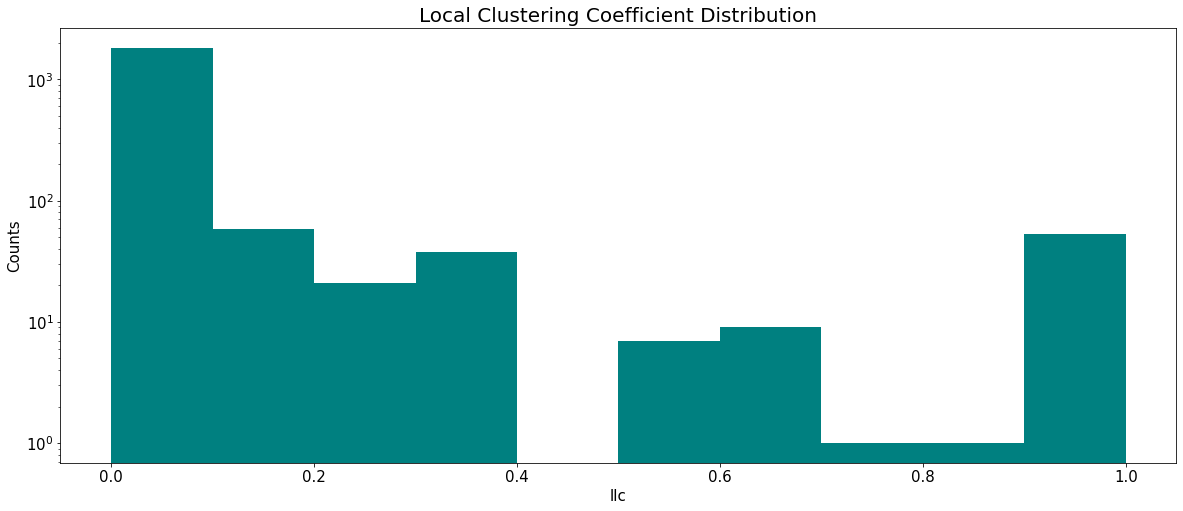

In [38]:
# plot historgram for local clustering coefficient of the graph
my_graph.plot_distribution(in_list=llc.values(), pdf=False, cum=False, bw=0.1,\
                        title="Local Clustering Coefficient Distribution",\
                        x_label="llc", y_label="Counts",\
                        x_scale="linear", y_scale="log", \
                        c="teal")

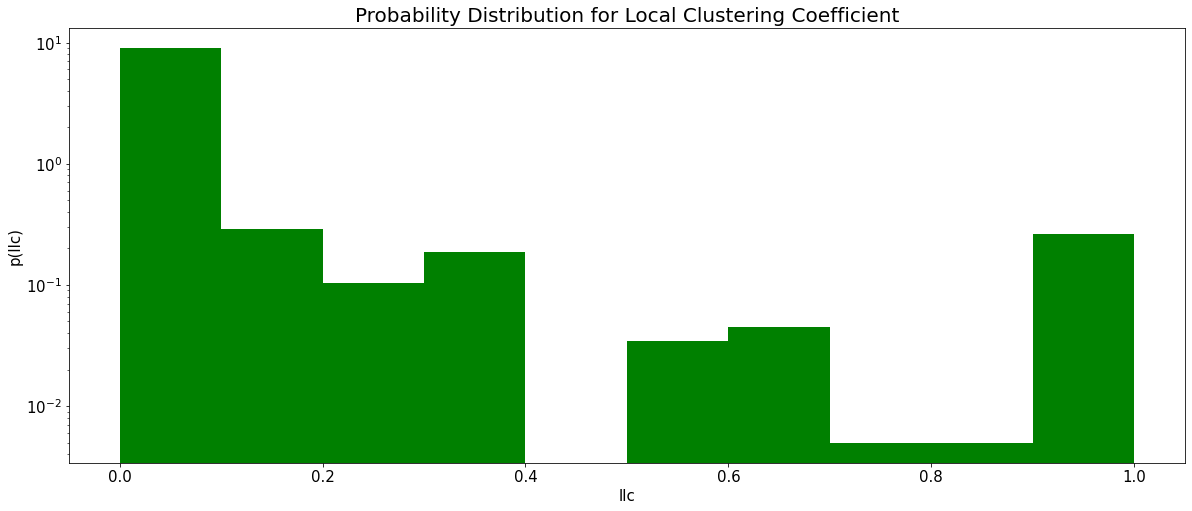

In [39]:
# plot probability distribution for local clustering coefficient of the graph
my_graph.plot_distribution(in_list=llc.values(), pdf=True, cum=False, bw=0.1, \
                        title="Probability Distribution for Local Clustering Coefficient", \
                        x_label="llc", y_label="p(llc)",\
                        x_scale="linear", y_scale="log", \
                        c="green")

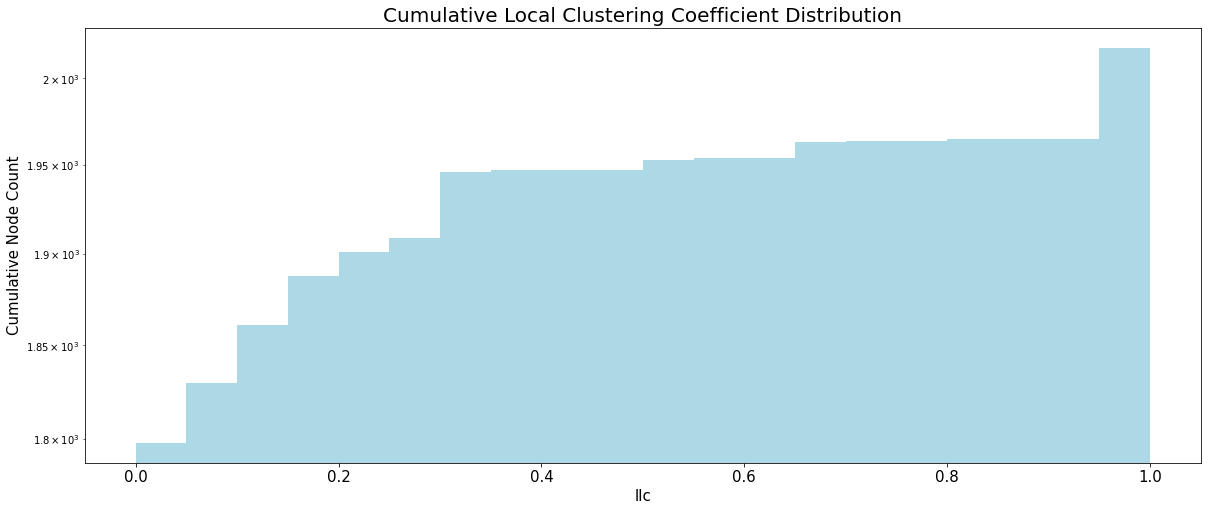

In [40]:
# plot cumulative distribution for local clustering coefficient of the graph
my_graph.plot_distribution(in_list=llc.values(), pdf=False, cum=True, bw=0.05,\
                        title="Cumulative Local Clustering Coefficient Distribution", \
                        x_label="llc", y_label="Cumulative Node Count", \
                        x_scale="linear", y_scale="log", \
                        c="lightblue")

#### Average Clustering Coefficient of the graph

The average of the local clustering coefficients of all the vertices n, is called the mean clustering coefficient of the graph. 

The Mean clustering coefficient is:    
    $$c = \frac{1}{n} \sum \limits _{n=1,n} c_{i}$$

Here, 
* n is number of vertices in the graph
* $c_{i}$ is local cluster cofficient of node i

In [41]:
# Find mean local clustering coefficient
mean_cc = sum(llc.values())/len(llc.values())
print(f"Mean Clustering Coefficient of the graph is: {round(mean_cc,3)}", "\n")

Mean Clustering Coefficient of the graph is: 0.046 



#### Node with the Largest Local Clustering Coefficient

In [42]:
# Find the nodes with largest local clustering coefficient
nodes_with_max_llc = my_graph.find_node_with_largest_val(close_cent)
print(f"Nodes with largest local clustering coefficient are: {nodes_with_max_llc}", "\n")

Nodes with largest local clustering coefficient are: [1356] 



### 8. Connectance , Number of Components and The size of the Largest Component: 

#### Connectance of the graph

In [43]:
connectance = avg_degree/(num_of_nodes-1)
print(f"The connectance of the graph is: {round(connectance, 3)}")

The connectance of the graph is: 0.001


#### Count the number of components of the graph

In [44]:
# Count the number of components
num_comp = nx.number_connected_components(G_protein)

print(f"Number of components in the graph are: {num_comp}")

Number of components in the graph are: 185


#### Find the the size of the largest component

In [45]:
# find the the size of the largest component
lg_comp = G_protein.subgraph(max(nx.connected_components(G_protein), key=len)).copy()

# size of the giant component
print(f"Size of the largest component of the graph is: {lg_comp.number_of_nodes()}")

Size of the largest component of the graph is: 1647


### 9. Is the graph scale free?

A network whose degree distribution follows a power law distribution is called a scale-free network.

We can plot the density distribution of degree of the network and check if the graph is scale free:

/Users/tanuja/opt/anaconda3/envs/NetworkTheory/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/Users/tanuja/opt/anaconda3/envs/NetworkTheory/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /


Value of alpha for the powerlaw distribution: 2.832 




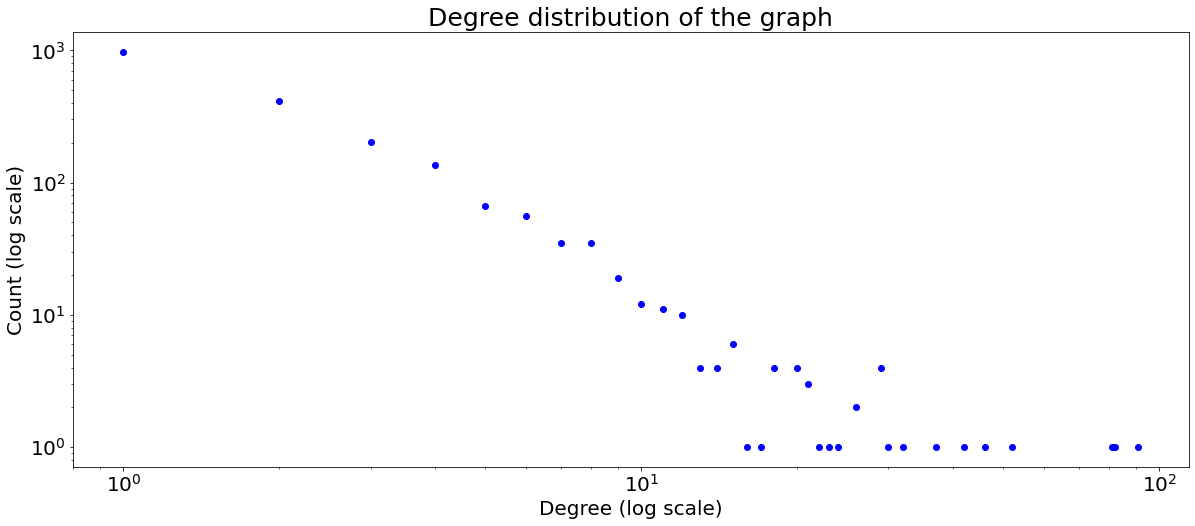

In [50]:
# Get the node degrees of the network
degree_list = [d for _, d in degrees.items()]

# Plot the power low distribution
my_graph.plot_power_low_distribution(degree_list)

From the above plot of degree density distribution, we can see that it produces a straight line plot in the x and y log scale. And the value of alpha of the powerlaw distribution is 2.832.

As a result, the network can be described as scale free network. 

We can also see that the presence of hubs in the network, towards the bottom right of the above plot. These are nodes, which have very high degree.

In [47]:
print("ln(ln(n)): {}".format(round(math.log(math.log(num_of_nodes)),3)), "\n")
print(f"Average distance between the nodes is: {round(mean_geo_dis,3)}","\n")

ln(ln(n)): 2.029 

Average distance between the nodes is: 5.607 



From the above results, we can see that average distance between the nodes is greater than ln(ln(n)). This indicates that the network is not a ultra small world network.

### 10. Does the graph show small world behavior?

In mathematical terms, the small-world effect is the hypothesis: `the mean distance between all the nodes of a network is small even for very large sized networks`. 

A network can be defined as a small world network, if the mean distance between any two randomly choosen nodes grows proportionally to the logarithm of number of nodes of the network.

Calculate and compare, the logarithm of number of nodes, average/mean distance and diameter of the network

In [48]:
print(f"Log of the number of nodes(ln n): {round(math.log(num_of_nodes),3)}")
print(f"Average distance between the nodes(<d>): {round(mean_geo_dis,3)}", "\n")


# log n / log <k>
print("ln n / ln <k>: {}".format(round(math.log(num_of_nodes) / math.log(avg_degree), 3)), "\n")

Log of the number of nodes(ln n): 7.61
Average distance between the nodes(<d>): 5.607 

ln n / ln <k>: 7.138 



From above results, we can see that logarithm of number of nodes for the protein network (ln n = 7.6) is comparable to the average distance between the nodes (avg_d = 5.6).

Hence, we can say that the graph shows small world network behaivour.

### 11. Is it supercritical?

A network is supercritical when the average degree of the network lies between 1 and logarithm of number of nodes (ln(n)).

In [49]:
# log of number of nodes
print(f"Log of the number of nodes(ln n): {round(math.log(num_of_nodes),3)}" "\n")

# Average degree of the network
print(f"Average degree is {avg_degree}","\n")

Log of the number of nodes(ln n): 7.61

Average degree is 2.9038652130822595 



From above results, we can see that the average degree of the network (avg_k = 2.904) lies between 1 and logarithm of the number of nodes (ln n = 7.61).
So, we can say that the network is supercritical.